In [1]:
import findspark
import pandas as pd #data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization



In [2]:
findspark.init('C:\Spark')

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("xyz_entertainment").getOrCreate()

In [5]:
df_movies= pd.read_csv("movies.csv")
df_movies.shape



(27278, 3)

In [6]:
df_ratings= pd.read_csv("ratings.csv")
df_ratings.head()

,ratings_id,userId,movieId,rating,timestamp
0,1,1,2,3.5,1112486027
1,2,1,29,3.5,1112484676
2,3,1,32,3.5,1112484819
3,4,1,47,3.5,1112484727
4,5,1,50,3.5,1112484580


In [7]:
df_links= pd.read_csv("links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
df_tags= pd.read_csv("tags.csv")
df_tags.head()

,tagid,userId,movieId,tag,timestamp
0,1,18,4141,Mark Waters,1240597180
1,2,65,208,dark hero,1368150078
2,3,65,353,dark hero,1368150079
3,4,65,521,noir thriller,1368149983
4,5,65,592,dark hero,1368150078


In [9]:
df_users= pd.read_csv("users.csv")
df_users.head()

,userId,gender,age,occupation,zipcode,income
0,1,F,1,10,48067,6641.64
1,2,M,56,16,70072,2030.68
2,3,M,25,15,55117,2028.31
3,4,M,45,7,2460,9377.37
4,5,M,25,20,55455,8482.56


In [10]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
type(df_movies)


pandas.core.frame.DataFrame

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [12]:
#2. Prepare a report of popular movie sorted by movie Id Split title and year into separate columns

In [13]:
df_movies['year'] =df_movies['title'].str.extract('.*\((.*)\).*',expand = False)
df_movies.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [14]:
df_movies.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [15]:
most_rated = df_movies.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Offside (2006)                                                                                       2
Darling (2007)                                                                                       2
Girl, The (2012)                                                                                     2
Blackout (2007)                                                                                      2
Men with Guns (1997)                                                                                 2
Casanova (2005)                                                                                      2
Beneath (2013)                                                                                       2
Clear History (2013)                                                                                 2
Johnny Express (2014)                                                                                2
Chaos (2005)                                                       

In [16]:
#3. Categorize movies by genres 

In [17]:
genres = df_movies.groupby('genres').size().sort_values(ascending=False)[:25]
genres

genres
Drama                    4520
Comedy                   2294
Documentary              1942
Comedy|Drama             1264
Drama|Romance            1075
Comedy|Romance            757
Comedy|Drama|Romance      605
Horror                    565
Crime|Drama               448
Drama|Thriller            426
Drama|War                 399
Horror|Thriller           374
Crime|Drama|Thriller      304
Thriller                  268
(no genres listed)        246
Western                   215
Action|Drama              210
Comedy|Crime              187
Action                    178
Comedy|Horror             170
Action|Comedy             155
Action|Thriller           146
Horror|Sci-Fi             140
Comedy|Musical            135
Action|Crime|Thriller     127
dtype: int64

In [18]:
#4. Check for null values in the data and replace it with NA 

In [19]:
df_movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [20]:
df_movies.isnull().sum()

movieId     0
title       0
genres      0
year       17
dtype: int64

In [21]:
df_ratings.isnull().any()

ratings_id    False
userId        False
movieId       False
rating        False
timestamp     False
dtype: bool

In [22]:
df_links.isnull().any()

movieId    False
imdbId     False
tmdbId      True
dtype: bool

In [23]:
df_tags.isnull().any()

tagid        False
userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [24]:
df_users.isnull().any()

userId        False
gender        False
age           False
occupation    False
zipcode       False
income        False
dtype: bool

In [25]:
df_tags["tag"].fillna("na", inplace = True)

In [26]:
df_links["tmdbId"].fillna("na", inplace = True)

In [27]:
df_movies["year"].fillna("na", inplace = True)

In [28]:
#5. How many movies were produced per year?

In [29]:
df_movies['year'] =df_movies['title'].str.extract('.*\((.*)\).*',expand = False)
df_year = df_movies.groupby('year').size().sort_values(ascending=False)[:25]
df_year 

year
2009    1113
2012    1022
2011    1016
2013    1011
2008     979
2010     962
2007     902
2006     855
2005     741
2014     740
2004     706
2002     678
2003     655
2001     633
2000     613
1998     555
1999     542
1997     528
1996     509
1995     474
1994     432
1993     371
1992     335
1988     325
1990     314
dtype: int64

In [30]:
#6. Plot distribution of Users’ Ages

Text(0,0.5,'Num of users')

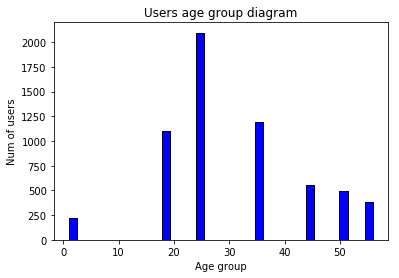

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df_users['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
#“bin” the range of values — divide the entire range of values into a series of intervals

# seaborn histogram
sns.distplot(df_users['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Users age group diagram')
plt.xlabel('Age group')
plt.ylabel('Num of users')


In [32]:
#7. Find ratings by age group 

In [33]:
Age = pd.merge(df_ratings, df_users[['userId','age']],
                 on='userId',
                 how='inner')
Age.head()



,ratings_id,userId,movieId,rating,timestamp,age
0,1,1,2,3.5,1112486027,1
1,2,1,29,3.5,1112484676,1
2,3,1,32,3.5,1112484819,1
3,4,1,47,3.5,1112484727,1
4,5,1,50,3.5,1112484580,1


In [34]:
df_ratings.rating.value_counts()

4.0    295135
3.0    226202
5.0    152562
3.5    112926
4.5     79848
2.0     74706
2.5     44791
1.0     35144
1.5     14029
0.5     13232
Name: rating, dtype: int64

In [35]:
#8. Find Ratings by Occupation 

In [36]:
Occupation = pd.merge(df_ratings, df_users[['userId','occupation']],
                 on='userId',
                 how='inner')
Occupation.head()

,ratings_id,userId,movieId,rating,timestamp,occupation
0,1,1,2,3.5,1112486027,10
1,2,1,29,3.5,1112484676,10
2,3,1,32,3.5,1112484819,10
3,4,1,47,3.5,1112484727,10
4,5,1,50,3.5,1112484580,10


In [37]:
#9. Find Ratings By State 

In [38]:
Zipcode = pd.merge(df_ratings, df_users[['userId','zipcode']],
                 on='userId',
                 how='inner')
Zipcode.head()

,ratings_id,userId,movieId,rating,timestamp,zipcode
0,1,1,2,3.5,1112486027,48067
1,2,1,29,3.5,1112484676,48067
2,3,1,32,3.5,1112484819,48067
3,4,1,47,3.5,1112484727,48067
4,5,1,50,3.5,1112484580,48067


In [39]:
#10. Find Ratings by Income 

In [40]:
Income = pd.merge(df_ratings, df_users[['userId','income']],
                 on='userId',
                 how='inner')
Income.head()

,ratings_id,userId,movieId,rating,timestamp,income
0,1,1,2,3.5,1112486027,6641.64
1,2,1,29,3.5,1112484676,6641.64
2,3,1,32,3.5,1112484819,6641.64
3,4,1,47,3.5,1112484727,6641.64
4,5,1,50,3.5,1112484580,6641.64


In [41]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [42]:
df_movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [43]:
df_movies[:10]

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


In [44]:
#merge ratings and users tables together on userId, the end goal is to find the average ratings per occupation
#This step is making the dataframe that holds all of the information desired.
ratingOccupation = pd.merge(df_ratings, df_users[['userId','occupation']],
                     on='userId',
                     how='left')
ratingOccupation.head()

,ratings_id,userId,movieId,rating,timestamp,occupation
0,1,1,2,3.5,1112486027,10.0
1,2,1,29,3.5,1112484676,10.0
2,3,1,32,3.5,1112484819,10.0
3,4,1,47,3.5,1112484727,10.0
4,5,1,50,3.5,1112484580,10.0


In [45]:
ratingOccupation = pd.merge(df_ratings, df_users[['userId','occupation']],
                     on='userId',
                     how='left')

ratingOccupation.rating.mean(axis=0)


3.5292716305462175

In [46]:
#Group by occupation, use aggregation to find the mean of the ratings by occupation
ratingOccupation.groupby('occupation').agg({'rating': 'mean'})[:20]

,rating
occupation,
0.0,3.548371
1.0,3.578029
2.0,3.609239
3.0,3.578813
4.0,3.519406
5.0,3.251040
6.0,3.490450
7.0,3.535757
8.0,3.687298
